# Example Out-of-Framework file
This file demonstrates how one can access the modules at different levels of abstraction (highest: access via MnistExperiment, lowest: MnistDataset)
## Analysis of MNIST

### Access via MnistExperiment

In [ ]:
import os
from src.datasets.mnist_dataset import MnistDataset, MnistDatasetArgs
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig()
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from src.experiments.mnist_experiment import MnistExperiment, MnistExperimentArgs

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
ex = MnistExperiment(
    MnistExperimentArgs(
        hidden_sizes=[64], experiment_id="mnist", use_cuda=False
    ).model_dump(),
    yaml_config.config,
)

train = ex._create_dataset("train")
val = ex._create_dataset("val")
test = ex._create_dataset("test")

sample = train[0]

plt.imshow(sample.input.view(28, 28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

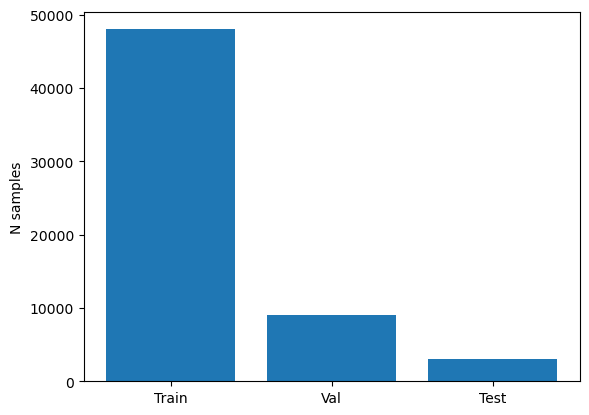

In [ ]:
plt.bar(["Train", "Val", "Test"], [len(train), len(val), len(test)])
plt.ylabel("N samples")

### Access via MnistDataset module

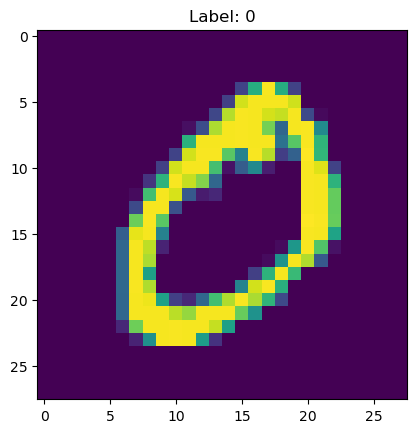

In [ ]:
mnist_data = MNIST(
    os.path.join(yaml_config.config.cache_dir, "mnist"),
    download=True,
)

config = MnistDatasetArgs()
train = MnistDataset(mnist_data, config, yaml_config.config, "train")
val = MnistDataset(mnist_data, config, yaml_config.config, "val")
test = MnistDataset(mnist_data, config, yaml_config.config, "test")

sample = train[1]

plt.imshow(sample.input.view(28, 28).cpu().numpy())
plt.title(f"Label: {sample.target.argmax().item()}")
plt.show()

Text(0, 0.5, 'N samples')

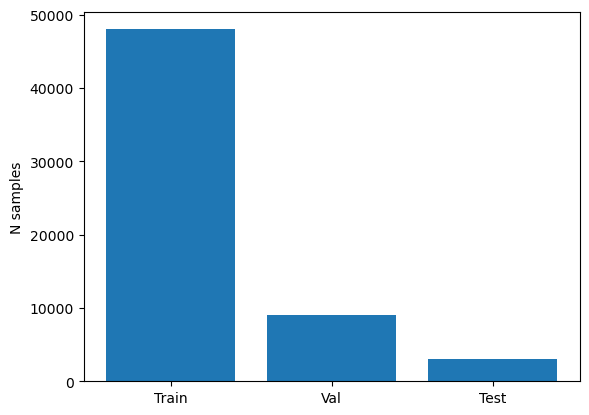

In [ ]:
plt.bar(["Train", "Val", "Test"], [len(train), len(val), len(test)])
plt.ylabel("N samples")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9809059..2.2184875].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


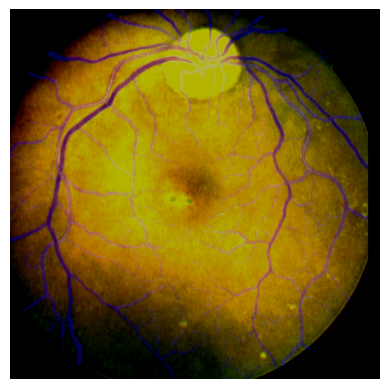

In [ ]:
from src.datasets.drive_dataset import DriveDataset, DriveDatasetArgs
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import torch

yaml_config = YamlConfig()
config = DriveDatasetArgs()
ds = DriveDataset(config, yaml_config.config)
sample = ds[1]

image = sample.input.permute(1, 2, 0).cpu().numpy()
alpha = 0.3  # Transparency level for the mask
mask_color = [255, 0, 0]
mask = sample.target

overlay = np.zeros_like(image)
overlay[mask == 1] = [0, 0, 255]

plt.imshow(image)
plt.imshow(overlay, alpha=alpha)
plt.axis("off")
plt.show()

In [ ]:
import kagglehub

path = kagglehub.dataset_download(
    "khoongweihao/chasedb1", path=yaml_config.config.cache_dir
)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/khoongweihao/chasedb1/versions/1
Please make sure you specified the correct resource identifiers.

In [ ]:
from src.experiments.ukbiobank_experiment import (
    UkBioBankExperiment,
    UkBiobankExperimentArgs,
)
from src.args.yaml_config import YamlConfig
import matplotlib.pyplot as plt

yaml_config = YamlConfig()
config = UkBiobankExperimentArgs(
    sam_model="vit_b", experiment_id="uk_biobank", drive_test_equals_val=False
)
exp = UkBioBankExperiment(config.model_dump(), yaml_config.config)

train = exp._create_dataset("train")
val = exp._create_dataset("val")
test = exp._create_dataset("test")

# Display samples sizes as hist
lens = {"train": len(train), "val": len(val), "test": len(test)}
lens

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/pydantic/main.py:292: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

ImageNet pretrained weights for HarDNet68 is loaded


/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/auto_sam_prompt_encoder/hardnet.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.l

{'train': 83414, 'val': 15, 'test': 14}

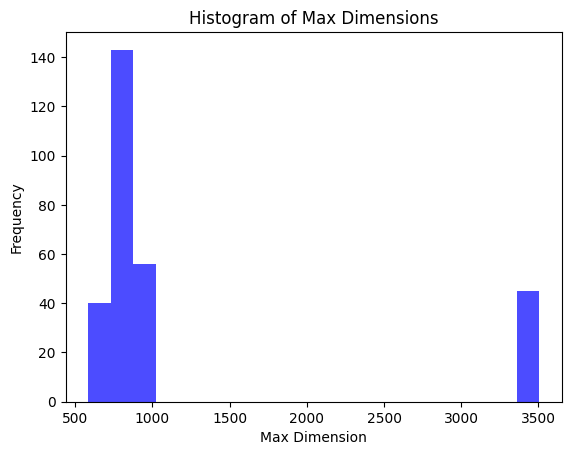

In [ ]:
widths, heights, ds_label = [], [], []
max_dim = []
for i in range(len(ds)):
    sample = ds[i]
    w, h = (
        sample.original_size[0].detach().item(),
        sample.original_size[1].detach().item(),
    )
    widths.append(w)
    heights.append(h)
    max_dim.append(max(w, h))
    ds_label.append("ground_truth")

# from src.datasets.ukbiobank_dataset import UkBiobankDataset, UkBiobankDatasetArgs
# from src.args.yaml_config import YamlConfig
# import random

# yaml_config = YamlConfig()
# config = UkBiobankDatasetArgs()
# biobank_ds = UkBiobankDataset(config, yaml_config.config)

# random_indices = random.sample(range(len(biobank_ds)), 1000)
# for i in random_indices:
#     widths.append(sample.original_size[0].detach().item())
#     heights.append(sample.original_size[1].detach().item())
#     ds_label.append("biobank (1000 random samples)")

plt.hist(max_dim, bins=20, alpha=0.7, color="blue")
plt.xlabel("Max Dimension Pixels")
plt.ylabel("Frequency")
plt.title("Histogram of Max Dimensions")
plt.show()

In [16]:
np.quantile(max_dim, 0.85)

3504.0

In [6]:
np.min(max_dim)

584.0

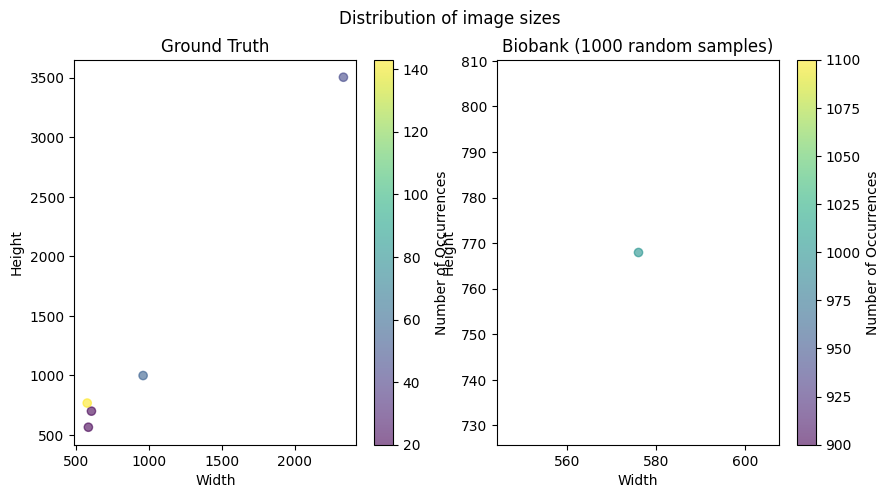

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# plot distribution of widths and heights as two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Distribution of image sizes")

# Scatter plot for widths and heights for ground_truth
# Count occurrences of each (width, height) pair
size_counts_gt = Counter(
    zip(
        [w for w, d in zip(widths, ds_label) if d == "ground_truth"],
        [h for h, d in zip(heights, ds_label) if d == "ground_truth"],
    )
)

# Extract widths, heights, and their counts
unique_widths_gt, unique_heights_gt, counts_gt = zip(
    *[(w, h, c) for (w, h), c in size_counts_gt.items()]
)

# Scatter plot for widths and heights with marker size based on counts
# Define a colormap
cmap = plt.get_cmap("viridis")

# Normalize counts for colormap
norm = plt.Normalize(vmin=min(counts_gt), vmax=max(counts_gt))

# Scatter plot for widths and heights with marker size and color based on counts
sc_gt = axs[0].scatter(
    unique_widths_gt, unique_heights_gt, c=counts_gt, cmap=cmap, alpha=0.6
)
axs[0].set_title("Ground Truth")
axs[0].set_xlabel("Width")
axs[0].set_ylabel("Height")

# Add colorbar
cbar_gt = plt.colorbar(sc_gt, ax=axs[0])
cbar_gt.set_label("Number of Occurrences")

# Count occurrences of each (width, height) pair
size_counts_biobank = Counter(
    zip(
        [w for w, d in zip(widths, ds_label) if d == "biobank (1000 random samples)"],
        [h for h, d in zip(heights, ds_label) if d == "biobank (1000 random samples)"],
    )
)

# Extract widths, heights, and their counts
unique_widths_biobank, unique_heights_biobank, counts_biobank = zip(
    *[(w, h, c) for (w, h), c in size_counts_biobank.items()]
)

# Normalize counts for colormap
norm_biobank = plt.Normalize(vmin=min(counts_biobank), vmax=max(counts_biobank))

# Scatter plot for widths and heights with marker size and color based on counts
sc_biobank = axs[1].scatter(
    unique_widths_biobank,
    unique_heights_biobank,
    c=counts_biobank,
    cmap=cmap,
    alpha=0.6,
)
axs[1].set_title("Biobank (1000 random samples)")
axs[1].set_xlabel("Width")
axs[1].set_ylabel("Height")

# Add colorbar
cbar_biobank = plt.colorbar(sc_biobank, ax=axs[1])
cbar_biobank.set_label("Number of Occurrences")

Text(0, 0.5, 'N samples')

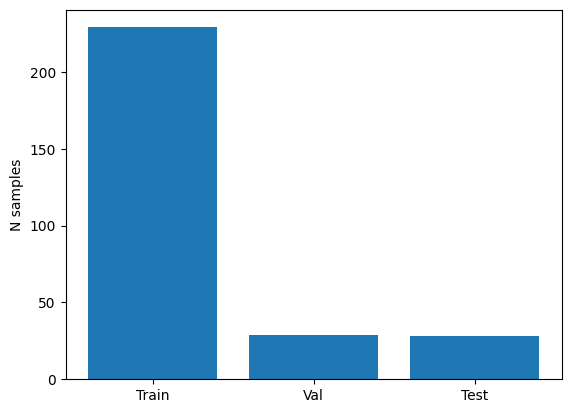

In [ ]:
train, val, test = ds.get_split("train"), ds.get_split("val"), ds.get_split("test")
plt.bar(["Train", "Val", "Test"], [len(train), len(val), len(test)])
plt.ylabel("N samples")

In [7]:
from src.datasets.aria_dataset import ARIADataset


aria = ARIADataset(config=config, yaml_config=yaml_config)
len(aria)

143

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Joined Train Size 229


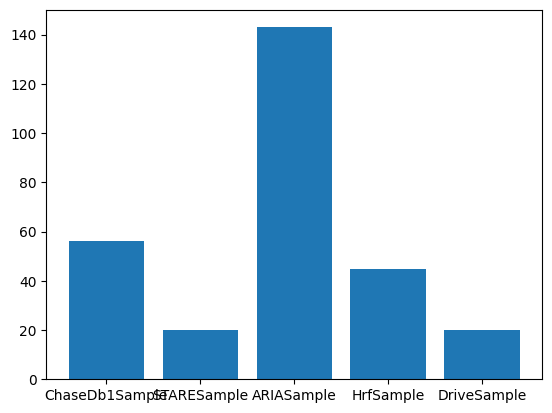

In [ ]:
from src.datasets.joined_retina_dataset import (
    JoinedRetinaDataset,
    JoinedRetinaDatasetArgs,
)
from src.args.yaml_config import YamlConfig
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import Counter

yaml_config = YamlConfig().config
config = JoinedRetinaDatasetArgs(drive_test_equals_val=False)
ds = JoinedRetinaDataset.from_config(config, yaml_config, seed=42)


sample_type = [type(s).__name__ for s in ds]
c = Counter(sample_type)
# plot hist
plt.bar(c.keys(), c.values())

print("Joined Train Size", len(ds.get_split("train")))

In [ ]:
from pathlib import Path


experiment_name = "multi_ds_vessel_experiment"
subdir = "prefinetuning_20samples"
Path("results") / experiment_name / subdir

PosixPath('results/multi_ds_vessel_experiment/prefinetuning_20samples')

<Axes: xlabel='Number of GT Samples', ylabel='Test IoU'>

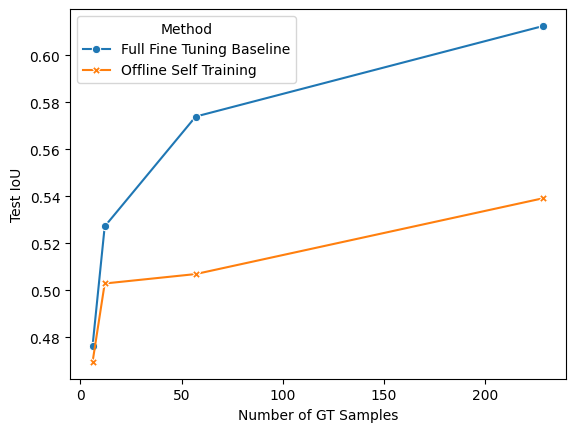

In [ ]:
import pandas as pd


csv_df = pd.read_csv("wb_export_offlineST_vs_baseline.csv")
csv_df = csv_df[[col for col in csv_df.columns if col.endswith("test_IoU")]]


data = []
for col in csv_df.columns:
    method = (
        "Full Fine Tuning Baseline"
        if "gt_vessels_patched4_baseline_" in col
        else "Offline Self Training"
    )
    n_samples = (
        col.replace("gt_vessels_patched4_baseline_", "")
        .replace("vessels_gt_patched4_OfflineST_fft_", "")
        .split("_")[0]
    )
    n_samples = int(n_samples) if n_samples != "all" else 229

    test_IoU = csv_df[col].dropna().item()

    data.append(
        {"Method": method, "Number of GT Samples": n_samples, "Test IoU": test_IoU}
    )

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns

sns.lineplot(
    data=df,
    x="Number of GT Samples",
    y="Test IoU",
    hue="Method",
    markers=True,
    style="Method",
    dashes=False,
)

<Axes: xlabel='Number of GT Samples', ylabel='Test IoU for Optimized Threshold'>

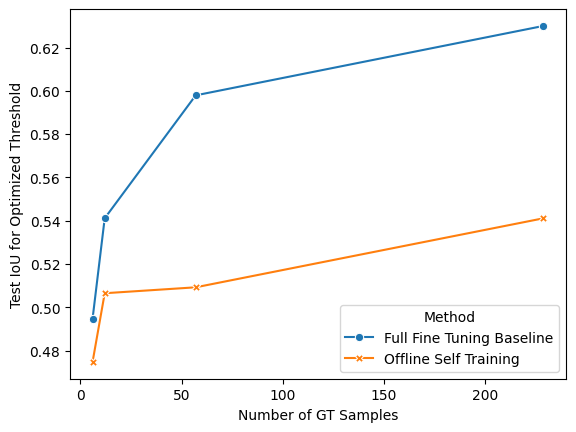

In [ ]:
import pandas as pd


csv_df = pd.read_csv("wb_export_offlineST_vs_baseline_optimalThreshold.csv")
csv_df = csv_df[
    [col for col in csv_df.columns if col.endswith("test_optimal_iou_threshold_IoU")]
]


data = []
for col in csv_df.columns:
    method = (
        "Full Fine Tuning Baseline"
        if "gt_vessels_patched4_baseline_" in col
        else "Offline Self Training"
    )
    n_samples = (
        col.replace("gt_vessels_patched4_baseline_", "")
        .replace("vessels_gt_patched4_OfflineST_fft_", "")
        .split("_")[0]
    )
    n_samples = int(n_samples) if n_samples != "all" else 229

    test_IoU = csv_df[col].dropna().item()

    data.append(
        {
            "Method": method,
            "Number of GT Samples": n_samples,
            "Test IoU for Optimized Threshold": test_IoU,
        }
    )

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns

sns.lineplot(
    data=df,
    x="Number of GT Samples",
    y="Test IoU for Optimized Threshold",
    hue="Method",
    markers=True,
    style="Method",
    dashes=False,
)

In [ ]:
import pandas as pd


csv_df = pd.read_csv("wb_export_baseline_optimizedThreshold.csv")
csv_df = csv_df[
    [col for col in csv_df.columns if col.endswith("test_optimal_iou_threshold_IoU")]
]


data = []
for col in csv_df.columns:
    method = (
        "4 Patches"
        if "patched4" in col
        else "16 Patches" if "patched16" in col else "No Patching"
    )
    n_samples = col.replace("_samples_aug - test_optimal_iou_threshold_IoU", "").split(
        "_"
    )[-1]
    n_samples = int(n_samples) if n_samples != "all" else 229
    if n_samples == 1:
        continue

    test_IoU = csv_df[col].dropna().item()

    data.append({"method": method, "n_samples": n_samples, "test_IoU": test_IoU})

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns

sns.lineplot(
    data=df,
    x="n_samples",
    y="test_IoU",
    hue="method",
    markers=True,
    style="method",
    dashes=False,
).set_title("Test IoU with optimized threshold based on val IoU")

FileNotFoundError: [Errno 2] No such file or directory: 'wb_export_baseline_optimizedThreshold.csv'

<Axes: xlabel='n_samples', ylabel='test_dice_score'>

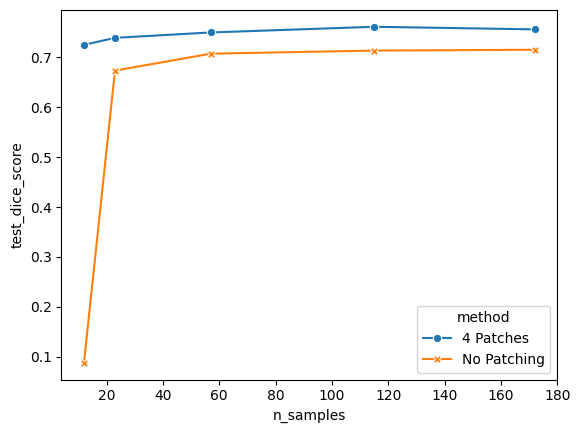

In [ ]:
import pandas as pd


csv_df = pd.read_csv("wb_export_baseline_dice.csv")
csv_df = csv_df[[col for col in csv_df.columns if col.endswith("test_dice_score")]]


data = []
for col in csv_df.columns:
    method = (
        "4 Patches"
        if "patched4" in col
        else "16 Patches" if "patched16" in col else "No Patching"
    )
    n_samples = col.replace("_samples_aug - test_dice_score", "").split("_")[-1]
    n_samples = int(n_samples) if n_samples != "all" else 229

    test_IoU = csv_df[col].item()

    data.append({"method": method, "n_samples": n_samples, "test_dice_score": test_IoU})

df = pd.DataFrame(data)
# plot line chart with one line per method and n_samples on x axis
import seaborn as sns

sns.lineplot(
    data=df,
    x="n_samples",
    y="test_dice_score",
    hue="method",
    markers=True,
    style="method",
    dashes=False,
)

In [1]:
from typing import cast
from src.datasets.joined_patched_retina_dataset import (
    JoinedPatchedRetinaDataset,
    PatchedVesselSample,
)
from src.datasets.joined_retina_dataset import JoinedRetinaDataset
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


def plot_sample_origin(split_key, ds: JoinedRetinaDataset | JoinedPatchedRetinaDataset):
    is_patched = isinstance(ds, JoinedPatchedRetinaDataset)
    limits = (
        [l * 4 if is_patched else l for l in [8, 12, 57, 229]]
        if split_key == "train"
        else ["all"]
    )
    data = {}

    def extract_name(sample):
        if is_patched:
            return cast(PatchedVesselSample, sample).origin_dataset
        return type(sample).__name__

    for limit in limits:
        split = ds.get_split(split_key, limit_samples=limit if limit != "all" else None)
        sample_type = [extract_name(s) for s in split]
        c = Counter(sample_type)
        data[limit] = c

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Sort limits in descending order
    sorted_limits = sorted(limits, reverse=True) if split_key == "train" else limits

    # Define colors for each limit using a different colormap
    colors = ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628"]
    sorted_keys = [
        "ARIASample",
        "ChaseDb1Sample",
        "DriveSample",
        "HrfSample",
        "STARESample",
    ]
    keys_map = {
        "ARIASample": "ARIA",
        "ChaseDb1Sample": "CHASEDB1",
        "DriveSample": "DRIVE",
        "HrfSample": "HRF",
        "STARESample": "STARE",
    }
    # Plot bars for each limit
    for i, limit in enumerate(sorted_limits):
        counts = data[limit]
        bar_width = 0.8 / len(
            sorted_limits
        )  # Adjust bar width based on the number of limits
        ax.bar(
            [x + i * bar_width for x in range(len(sorted_keys))],
            [counts[k] for k in sorted_keys],
            width=bar_width,
            color=colors[i],
            alpha=0.6,
            label=f"Limit {limit}",
        )
        ax.set_xticks(
            [
                x + bar_width * (len(sorted_limits) - 1) / 2
                for x in range(len(sorted_keys))
            ]
        )
        ax.set_xticklabels([keys_map[k] for k in sorted_keys])

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Number of Samples")
    ax.set_title(
        f'Number of samples in {split_key} split of {"Patched" if is_patched else ""} Retina Dataset'
    )
    ax.legend()

    # Add horizontal gridlines in steps of 5
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from src.datasets.joined_retina_dataset import (
    JoinedRetinaDataset,
    JoinedRetinaDatasetArgs,
)
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig().config
config = JoinedRetinaDatasetArgs(drive_test_equals_val=False)
ds = JoinedRetinaDataset.from_config(config, yaml_config, seed=42)
len(ds)

284

In [3]:
len(ds.get_split("train")), len(ds.get_split("val")), len(ds.get_split("test"))

(229, 29, 28)

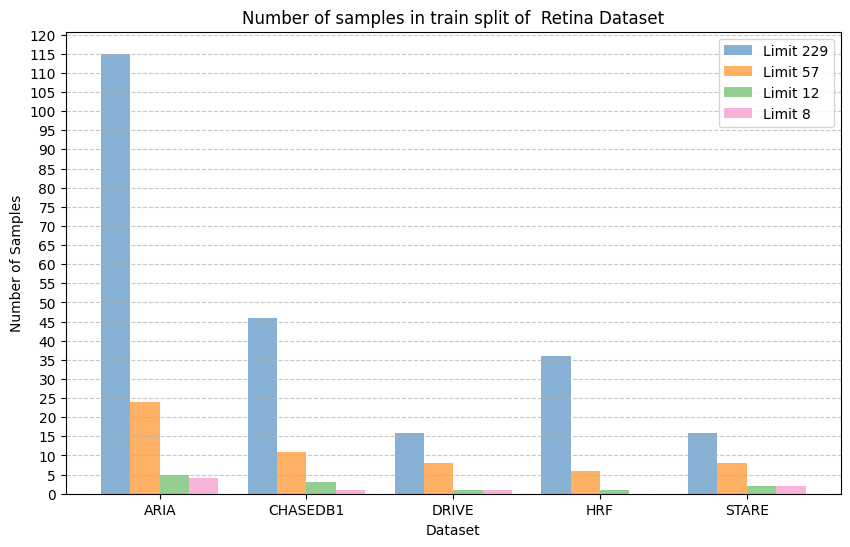

In [4]:
plot_sample_origin("train", ds)

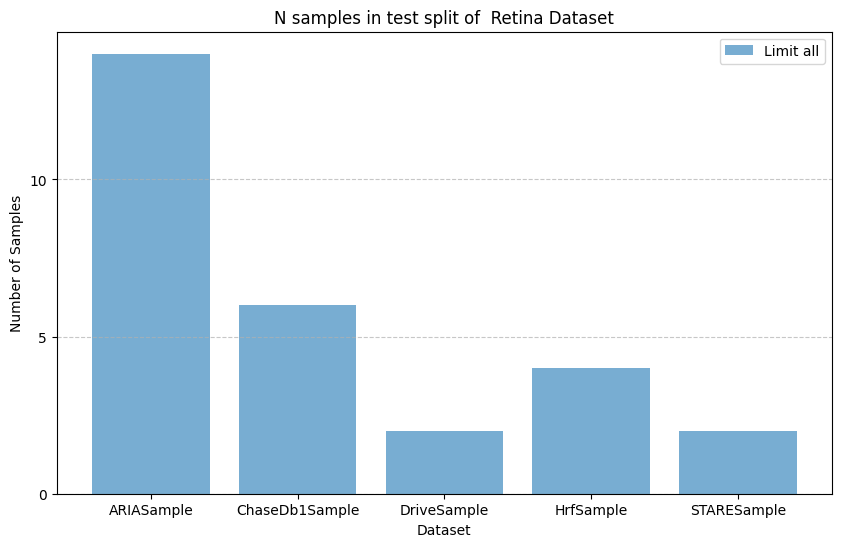

In [ ]:
plot_sample_origin("test", ds)

In [ ]:
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig().config
from src.datasets.joined_patched_retina_dataset import (
    JoinedPatchedRetinaDataset,
    PatchedVesselSample,
)
from src.datasets.joined_retina_dataset import JoinedRetinaDatasetArgs
from typing import cast

config = JoinedRetinaDatasetArgs(drive_test_equals_val=False, augment_train=False)
patched_ds = JoinedPatchedRetinaDataset.from_config(
    config, yaml_config, seed=42, patches=16
)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train_ds = patched_ds.get_split("train", limit_samples=115 * 16)

total = 0
unique_origin_sample_idx = set()
unique_intra_sample_idx = set()
unqique_patches = set()
for s in train_ds:
    s = cast(PatchedVesselSample, s)
    unique_origin_sample_idx.add(s.origin_sample_idx)
    unique_intra_sample_idx.add(s.intra_sample_idx)
    unqique_patches.add(f"{s.origin_sample_idx}_{s.intra_sample_idx}")
    total += 1

print(
    "total samples: ",
    total,
    "sample origins: ",
    len(unique_origin_sample_idx),
    "intra samples: ",
    len(unique_intra_sample_idx),
    "unique patches: ",
    len(unqique_patches),
)

total samples:  1840 sample origins:  77 intra samples:  16 unique patches:  1232


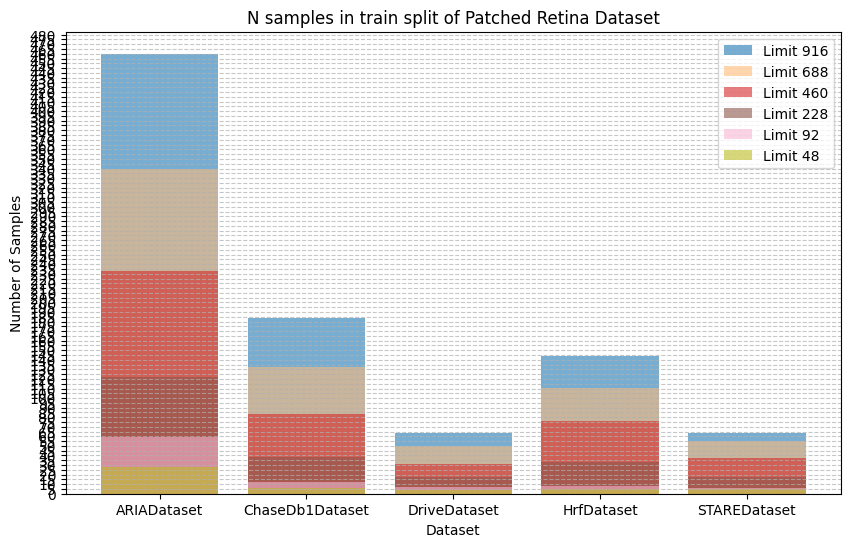

In [3]:
plot_sample_origin("train", patched_ds)

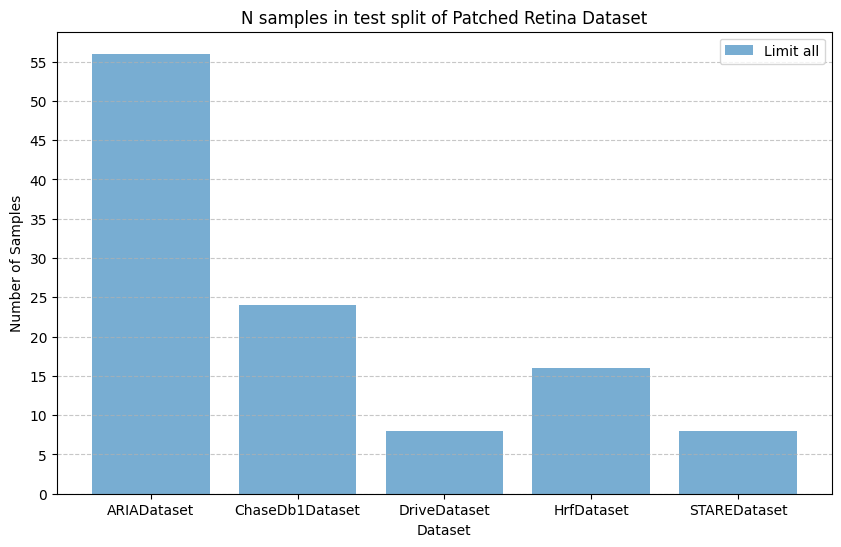

In [4]:
plot_sample_origin("test", patched_ds)

HrfDataset


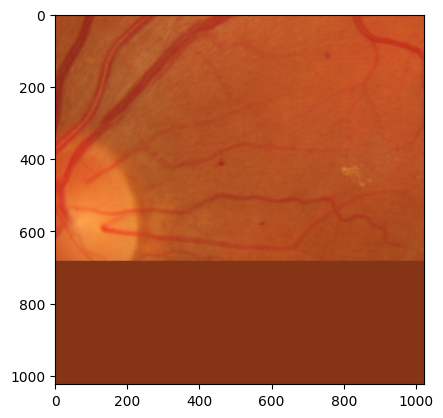

In [ ]:
from src.models.segment_anything.utils.transforms import ResizeLongestSide

patched_sample = patched_ds[3]
print(patched_sample.origin_dataset)
pixel_mean, pixel_std = (
    yaml_config.fundus_pixel_mean,
    yaml_config.fundus_pixel_std,
)
sam_trans = ResizeLongestSide(
    yaml_config.fundus_resize_img_size,
    pixel_mean=pixel_mean,
    pixel_std=pixel_std,
)

unnorm_img = sam_trans.undo_normalize(patched_sample.input) / 255.0
plt.imshow(unnorm_img.permute(1, 2, 0).cpu().numpy())

In [ ]:
import json

file = "/dhc/groups/mp2024cl2/results/multi_ds_vessel_experiment/baseline_patched4_all_samples_aug/2025-02-16_01#38#17/history.json"
with open(file) as f:
    history = json.load(f)

epoch_index_of_test_model = history["epoch_index_of_test_model"]
history["epochs"][epoch_index_of_test_model]["val"]["average"]

{'metrics': {'dice+bce_loss': 0.4189292605106647,
  'dice_loss': 0.3171559679202544,
  'bce_loss': 0.10177328953376183,
  'dice_score': 0.7785481958260166,
  'IoU': 0.6422101465182556,
  'roc_auc': 0.966715487114067,
  'optimal_iou_threshold': 0.6146076146076146,
  'optimal_iou_threshold_dice_score': 0.7872107302343893,
  'optimal_iou_threshold_IoU': 0.653567276801053,
  'optimal_auc_threshold': 0.03597105584011819,
  'optimal_auc_threshold_dice_score': 0.5931033981450868,
  'optimal_auc_threshold_IoU': 0.4261083915924209},
 'loss': 0.4189292605106647}

In [ ]:
from src.datasets.offline_st_dataset import OfflineSTTrainDataset, OfflineStDatasetArgs
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig()
config = OfflineStDatasetArgs(pseudo_labels_dir="teacher_12_samples", gt_limit=12)
ds = OfflineSTTrainDataset(config, yaml_config.config, seed=42)

indexes = {}
l = len(ds)
for i, (origin_ds, sample_index) in enumerate(ds):
    if origin_ds not in indexes:
        indexes[origin_ds] = list()
    indexes[origin_ds].append(sample_index)
    print(f"\r{i}/{l}", end="")

print()
for key, idxs in indexes.items():
    print(f"{key}: unique {len(set(idxs))} total {len(idxs)}")

163896/163897
pseudo: unique 131113 total 131113
gt: unique 12 total 32784


In [5]:
from src.experiments.multi_ds_vessel_experiment import (
    MultiDsVesselExperiment,
    MultiDSVesselExperimentArgs,
)
import pandas as pd
import torch
from src.args.yaml_config import YamlConfig
from src.models.base_model import Loss
import matplotlib.pyplot as plt
yaml_config = YamlConfig().config
exp1 = MultiDsVesselExperiment(
    MultiDSVesselExperimentArgs(
        sam_model="vit_b",
        experiment_id="multi_vessel_ds",
        wandb_tags=[],
        limit_train_samples=6 * 4,
        batch_size=3,
        patch_samples=4,
        from_checkpoint="/dhc/home/tobias.fiedler/mp-lippert-experiments/results/multi_ds_vessel_experiment/baseline_patched4_6_samples_aug/2025-02-16_12#47#18/model.pt",

    ).model_dump(),
    yaml_config,
)
exp2 = MultiDsVesselExperiment(
    MultiDSVesselExperimentArgs(
        sam_model="vit_b",
        experiment_id="multi_vessel_ds",
        wandb_tags=[],
        limit_train_samples=6 * 4,
        batch_size=3,
        patch_samples=4,
        from_checkpoint="/dhc/home/tobias.fiedler/mp-lippert-experiments/results/multi_ds_vessel_experiment/OfflineST_patched4_student_fft_6_samples_mixedLabels/2025-02-26_09#50#11/model.pt",
        
    ).model_dump(),
    yaml_config,
)

baseline = exp1.model
offline_st = exp2.model

baseline.eval()
offline_st.eval()
dl = exp1._create_dataloader("test")
metrics = []
for batch in dl:
    batch = batch.cuda()
    with torch.no_grad():
        output_baseline = baseline(batch)
        output_offline_st = offline_st(batch)
        baseline_loss = baseline.compute_loss(output_baseline, batch)
        offlinest_loss = offline_st.compute_loss(output_offline_st, batch)
    m = {
        f"baseline_{k}": v for k,v in baseline_loss.metrics.items()
    }
    m.update({
        f"offlinest_{k}": v for k,v in offlinest_loss.metrics.items()
    })
    metrics.append(m)
    print(
        f"Baseline Loss: {baseline_loss.loss.item()} OfflineST Loss: {offlinest_loss.loss.item()}"
    )

df = pd.DataFrame(metrics)

/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/pydantic/main.py:292: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/segment_anything/build_sam.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

ImageNet pretrained weights for HarDNet68 is loaded
loading model from checkpoint /dhc/home/tobias.fiedler/mp-lippert-experiments/results/multi_ds_vessel_experiment/baseline_patched4_6_samples_aug/2025-02-16_12#47#18/model.pt


/dhc/home/tobias.fiedler/mp-lippert-experiments/src/experiments/base_experiment.py:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(path, map_location="cuda"),


/dhc/home/tobias.fiedler/conda3/envs/autosam/lib/python3.10/site-packages/pydantic/main.py:292: UserWarning: Pydantic serializer warnings:
  Expected `float` but got `int` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
/dhc/home/tobias.fiedler/mp-lippert-experiments/src/models/segment_anything/build_sam.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

ImageNet pretrained weights for HarDNet68 is loaded
loading model from checkpoint /dhc/home/tobias.fiedler/mp-lippert-experiments/results/multi_ds_vessel_experiment/OfflineST_patched4_student_fft_6_samples_mixedLabels/2025-02-26_09#50#11/model.pt

Baseline Loss: 0.6723735332489014 OfflineST Loss: 0.5678269863128662
Baseline Loss: 0.575901448726654 OfflineST Loss: 0.39187318086624146
Baseline Loss: 0.5803098678588867 OfflineST Loss: 0.4100840091705322
Baseline Loss: 0.6643165946006775 OfflineST Loss: 0.4961853623390198
Baseline Loss: 0.652375340461731 OfflineST Loss: 0.4892503023147583
Baseline Loss: 0.5848287343978882 OfflineST Loss: 0.42887595295906067
Baseline Loss: 0.6648169755935669 OfflineST Loss: 0.4759331941604614
Baseline Loss: 0.702330470085144 OfflineST Loss: 0.562286913394928
Baseline Loss: 0.7821860313415527 OfflineST Loss: 0.5827758312225342
Baseline Loss: 0.6874369382858276 OfflineST Loss: 0.5141819715499878
Baseline Loss: 0.7520374655723572 OfflineST Loss: 0.662938237190